- SOURCE https://campus.datacamp.com/courses/introduction-to-network-analysis-in-python
- REF https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/

# Network Analysis
Modeling relationship between entities.

#### Examples of Network
- Social Network
    > Modeling relationship between people
- Transportation Network
    > Modeling connectivity between locations, as determined by roads or flight paths connecting them
    
#### Examples of Analysis
- Insights
- Important entities: influencers in social network
- Pathfinding: most efficient transport path
- CLustering: finding communities

#### Network Structure
Graph { (Node)---Edge--(Node) }
- Node
- Edge
- Graph

#### NetworkX API
> https://networkx.org/documentation/stable/tutorial.html

In [1]:
import networkx as nx

In [3]:
# Create an empty graph(network)
G = nx.Graph()

# Add nodes
nodes_list = [1, 2, 3]
G.add_nodes_from(nodes_list)

# Print nodes
G.nodes()

NodeView((1, 2, 3))

In [11]:
# Add edge between nodes
G.add_edge(1, 2)

# Print edges
G.edges()

EdgeView([(1, 2)])

In [7]:
# Add metadata to the node
G.nodes[1]['label'] = 'blue'

# Print nodes with data
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

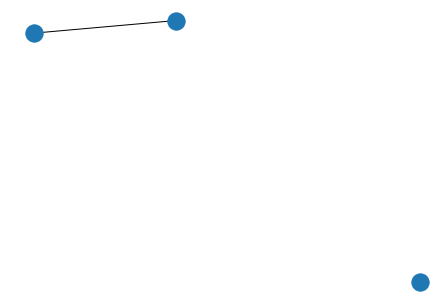

In [13]:
import matplotlib.pyplot as plt

nx.draw(G)
plt.show()

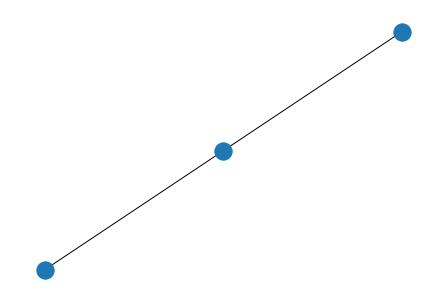

In [15]:
# Add edge between nodes (2,3)
G.add_edge(2, 3)

nx.draw(G)
plt.show()

[`output expression` for `iterator variable` in `iterable` if `predicate expression`]

Sample code from datacamp

```
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]
```

#### Type of Graphs

- Undirected Graphs
    > e.g. Facebook's social graph
    > ()---()
    > edges don't have any inherent directionality associated with them
    > (accepting friend request then connected)
    
    ```
    G = nx.Graph()
    type(G)
    >>> networkx.classes.graph.Grpah
    ```
    

- Directed Graphs
    > e.g. Twitter's social graph
    > ()-->()
    > because of the nature of how users interact with one another
    > (just follow one whether the one follow back or not)
    > an inherent directionality associated with the graph
    
    ```
    D = nx.DiGraph()
    type(D)
    >>> networkx.classes.digraph.DiGraph
    ```
    

- Multi(Di)Grpah
    > e.g. Trip records between bike sharing stations
    > ()≡≡>()
    
    ```
    M = nx.MultiGraph()
    type(M)
    >>> networkx.classes.multigraph.MultiGraph
    ```
    ```
    MD = nx.MultiDiGraph()
    type(MD)
    >>> networkx.classes.multidigraph.MultiDiGraph
    ```

#### Weight on Graphs

- Edges can contain weights
    > collapsing 3 edges into a single one and give them as a weight metadata with the value '3', indicating that it was orginally 3 edges between the pair of nodes

```
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1
```

#### Self-loops
- Nodes that are connected to themselves
    > e.g. in certain scenarios, such as in bike-sharing data, where start and end station are same.

```
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))
```

### Network Visualization

#### Matrix plots
- Undirected graph
- Directed graph: not necessarily to be symmetrical

```
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# import networkx as nx
# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()
```

#### Arc plots
- a transformation of the node-link diagram layout, in which nodes are ordered along one axis of the plot, and edges are drawn using circular arcs from one node to another

```
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
# https://nxviz.readthedocs.io/en/latest/modules.html?highlight=ArcPlot#nxviz.plots.ArcPlot
a2 = ArcPlot(T, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
```

#### Circos plots
- a transformation of the ArcPlot, such that the two ends of the ArcPlot are joined together into a circle.
- Circos Plots were originally designed for use in genomics, and you can think of them as an aesthetic and compact alternative to Arc Plots.

```
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()
```

### Degree Centrality
- (Number of Neighbors I have) / (Number of Neighbors I Could Possibly Have)
- Examples of node with high degree centrality:
    - Twitter broadcasters(having many followers)
    - Airport transportation hubs
    - Disease super-spreaders

```
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)
```

```
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
print(degrees)
```

```
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist([len(list(T.neighbors(n))) for n in T.nodes()])
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter([len(list(T.neighbors(n))) for n in T.nodes()], list(deg_cent.values()))
plt.show()
```

### Pathfinding (or Finding paths)

Pathfinding is important for
- Optimization: e.g. shortest transport paths
- Modeling: e.g. diease spread, information passing

##### Breadth-First Search (BFS) Algorithm
- e.g. Shortest path between two nodes

1. checking whether the destination node is present in neighbors
```
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
```

2. (Adding into step 1) not present in the neighbors
```
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
          
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])
```

3. (COMPLETED Ver.) Returning False if there's no path between two nodes.
```
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False
```

##### All shortest paths
- Set of paths
- Each path is shortest path between a given pair of nodes
- Done for all node pairs

#### Betweenness Centrality
- Definition: (num. shortest paths through node) / (all possible shortest paths)
- It captures bottleneck nodes in a graph, rather than highly connected nodes.
- Application
    - Bridges between liberal- and conservative-leaning Twitter users
    - Critical information transfer links

```
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()
```

- e.g.1.
> To find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away

```
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(nx.degree_centrality(G).values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())
```

- e.g.2. betweenness centrality (Twitter)

```
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())
```

## Communities & Cliques
---
### Cliques
- Social cliques: tightly-knit groups
    >`new person doesn't really know everybody else, and vice versa.` so 
- Network cliques(cliques in network theory): completely connected graphs
---
- Simplest complex clique: a triangle
---
#### Triangle Applications
- Friend recommendation systems (trianle closures)

1. Identifying triangle relationships

```
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle
```

2. Finding nodes involved in triangles

```
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 35
```

3. Finding open triangles

```
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)
```

#### Maximal Cliques
- Definition: a clique that, when extended by one node is no longer a clique
- Applications: **community finding**

```
import networkx as nx
G = nx.barbell_graph(m1=5, m2=1)
nx.find_cliques(G)
```

Finding all maximal cliques of size "n"

```
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3)) == 33
```

#### Subgraphs
- e.g. for Visualizd portions of a large graph
    - particular Paths
    - particular Communities/cliques
    - Degrees of separation from a node

```
import networkx as nx
G = nx.erdos_renyi_graph(n=20, p=0.2)
```

```
nodes = G.neighbors(8)
nodes.append(8)
```

```
#Subgraph
G_8 = G.subgraph(nodes)

#Draw
nx.draw(G_8, with_labels=True)
```

Subgraph 1

```
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw, with_label=True)
plt.show()
```

Subset 2

```
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()
```

---

Maximum number of edges in a undirected graph with n nodes(vertices)
> n * ( n - 1 ) / 2
- no self-loops

# Casestudy

##### Data
- Github user collaboration network
- Nodes: users
- Edges: collaboration on same Github repository
- Goals:
    - Analyze structure, including basic properties
    - Visualize data via _nxviz_
    - Build simple recommendation systen

the distribution of node degrees computed across all nodes in a network
```
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()
```

betweenness centrality
```
# Plot the betweenness centrality of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()
```

#### Visualization via _nxviz_

- **Connected Component Subgraphs**
    > `nx.connected_component_subgraphs(G)`

- Matrix Plot
    - In a MatrixPlot, the matrix is the representation of the edges.

```
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()
```

- Arc Plot
    - ArcPlot of the GitHub collaboration network, with authors sorted by degree.
    
```
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n in G.nodes():

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# # Iterate over all the nodes in G, including the metadata
# for n, d in G.nodes(data=True):

#     # Calculate the degree of each node: G.node[n]['degree']
#     G.node[n]['degree'] = nx.degree(G, n)

# Create the ArcPlot object: a
a = ArcPlot(G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()
```

- Circos Plot
    - Make a CircosPlot of the network, again, with GitHub users sorted by their degree, and grouped and coloured by their 'grouping' key.
    
```
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the CircosPlot object: c
c = CircosPlot(G, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()
```

### Cliques
- Definition:
    - Group of nodes
    - Fully connected
- Simplest clique: edge
- Simplest complex clique: triangle

#### Maximal cliques
- Definition:
    - a clique that cannot be extended by adding a node
    - `nx.find_cliques(G)`

```
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()
```

### Github user collaboration network

- Find important users
    - Degree Centrality & Betweenness Centrality

```
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(list(deg_cent.values()))

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)
```

- Find largest communities of collaborators
    - Largest Maximal Cliques & BFS algorithm

```
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
# .copy() of the graph to obtain a mutatable version
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    # zip function to create a list of tuples
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()
```

- Build a collaboration recommendation system
    - (Recommending co-editors who have yet to edit together)
    - Open-triangle

```
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count >= all_counts[-10]]
print(top10_pairs)
```